# Telecom Churn Prediction - Starter Notebook

**Author:** Vinay Shivaram

The goal of this notebook is to provide an overview of how write a notebook and create a submission file that successfully solves the churn prediction problem. Please download the datasets, unzip and place them in the same folder as this notebook.

We are going to follow the process called CRISP-DM.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" style="height: 400px; width:400px;"/>

After Business and Data Understanding via EDA, we want to prepare data for modelling. Then evaluate and submit our predictions.

# 0. Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# 1. Loading dependencies & datasets

Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

Reading and understanding the data

Next, we load our datasets and the data dictionary file.

The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 

So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [3]:
#COMMENT THIS SECTION INCASE RUNNING THIS NOTEBOOK LOCALLY

#Checking the kaggle paths for the uploaded datasets
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telecom-churn-case-study/telecom-churn-case-study-vinay-shivram.ipynb
/kaggle/input/mlc32telecomchurncasestudy/data_dictionary.csv
/kaggle/input/mlc32telecomchurncasestudy/sample.csv
/kaggle/input/mlc32telecomchurncasestudy/train.csv
/kaggle/input/mlc32telecomchurncasestudy/test.csv


In [4]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW
#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)

df = pd.read_csv("../input/mlc32telecomchurncasestudy/train.csv")
unseen = pd.read_csv("../input/mlc32telecomchurncasestudy/test.csv")
sample = pd.read_csv("../input/mlc32telecomchurncasestudy/sample.csv")
data_dict = pd.read_csv("../input/mlc32telecomchurncasestudy/data_dictionary.csv")

print(df.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [5]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [6]:
df.shape

(69999, 172)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [8]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

Handling missing values
and  Handling missing values in columns

In [9]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.9
count_rech_2g_6,74.9
night_pck_user_6,74.9
arpu_2g_6,74.9
date_of_last_rech_data_6,74.9
...,...
last_day_rch_amt_8,0.0
vol_2g_mb_6,0.0
vol_2g_mb_7,0.0
vol_2g_mb_8,0.0


In [10]:
# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [11]:
# Delete the columns having more than 30% missing values
df = df.drop(col_list_missing_30, axis=1)

In [12]:
df.shape

(69999, 142)

Deleting the date columns as the date columns are not required in our analysis

In [13]:
# List the date columns
date_cols = [k for k in df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [14]:
# Dropping date columns
df = df.drop(date_cols, axis=1)

Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on the data analysis.

In [15]:
# Drop circle_id column
df = df.drop('circle_id', axis=1)

In [16]:
df.shape

(69999, 135)

In [17]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

In [18]:
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

370.0

In [19]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,0.0,0.0,0.0,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,0.0,0.0,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507

In [20]:
df.shape

(21018, 136)

In [21]:
# Count the rows having more than 50% missing values
df_missing_rows_50 = df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
df_missing_rows_50.shape

(80, 136)

In [22]:
# Deleting the rows having more than 50% missing values
df = df.drop(df_missing_rows_50.index)
df.shape

(20938, 136)

In [23]:
# Checking the missing values in columns again
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
loc_og_mou_8,2.75
loc_og_t2t_mou_8,2.75
loc_og_t2f_mou_8,2.75
std_ic_t2o_mou_8,2.75
loc_og_t2c_mou_8,2.75
...,...
total_rech_amt_8,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00


In [24]:
# Listing the columns of MOU Aug(8)
print(((df_missing_columns[df_missing_columns['null'] == 2.75]).index).to_list())

['loc_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_8', 'std_ic_t2o_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_ic_t2m_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'std_ic_t2t_mou_8', 'og_others_8', 'loc_ic_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'roam_og_mou_8', 'spl_ic_mou_8', 'onnet_mou_8', 'roam_ic_mou_8', 'isd_ic_mou_8', 'offnet_mou_8', 'ic_others_8']


In [25]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_8 = df[(df['loc_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2f_mou_8'].isnull()) & (df['roam_og_mou_8'].isnull()) & (df['std_ic_t2m_mou_8'].isnull()) &
  (df['loc_og_t2t_mou_8'].isnull()) & (df['std_ic_t2t_mou_8'].isnull()) & (df['loc_og_t2f_mou_8'].isnull()) & (df['loc_ic_mou_8'].isnull()) &
  (df['loc_og_t2c_mou_8'].isnull()) & (df['loc_og_mou_8'].isnull()) & (df['std_og_t2t_mou_8'].isnull()) & (df['roam_ic_mou_8'].isnull()) &
  (df['loc_ic_t2m_mou_8'].isnull()) & (df['std_og_t2m_mou_8'].isnull()) & (df['loc_ic_t2t_mou_8'].isnull()) & (df['std_og_t2f_mou_8'].isnull()) & 
  (df['std_og_t2c_mou_8'].isnull()) & (df['og_others_8'].isnull()) & (df['std_og_mou_8'].isnull()) & (df['spl_og_mou_8'].isnull()) & 
  (df['std_ic_t2f_mou_8'].isnull()) & (df['isd_og_mou_8'].isnull()) & (df['std_ic_mou_8'].isnull()) & (df['offnet_mou_8'].isnull()) & 
  (df['isd_ic_mou_8'].isnull()) & (df['ic_others_8'].isnull()) & (df['std_ic_t2o_mou_8'].isnull()) & (df['onnet_mou_8'].isnull()) & 
  (df['spl_ic_mou_8'].isnull())]

df_null_mou_8.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
177,177,0.0,0.0,0.0,596.301,146.073,0.0,55.19,3.26,NaN,45.51,12.34,NaN,0.0,0.0,NaN,0.0,0.00,NaN,55.19,3.26,NaN,43.83,12.34,NaN,0.00,0.00,NaN,0.00,0.00,NaN,99.03,15.61,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.3,0.0,NaN,0.0,0.0,NaN,1.30,0.00,NaN,0.0,0.0,NaN,0.38,2.71,NaN,1.29,0.0,NaN,102.01,18.33,0.0,50.01,16.66,NaN,160.68,58.53,NaN,5.06,0.40,NaN,215.76,75.59,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.13,0.0,NaN,0.0,0.0,NaN,1.13,0.00,NaN,217.04,75.59,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.15,0.00,NaN,12,8,5,704,178,0,154,50,0,154,30,0,284.50,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,332,0.0,0.0,0.00,1,441.0
183,183,0.0,0.0,0.0,263.340,806.465,0.0,211.89,119.89,NaN,94.69,106.08,NaN,0.0,0.0,NaN,0.0,0.00,NaN,18.88,1.08,NaN,7.51,0.69,NaN,1.43,1.88,NaN,0.00,25.24,NaN,27.83,3.66,NaN,193.01,118.81,NaN,85.74,78.24,NaN,0.0,0.0,NaN,0.0,0.0,NaN,278.76,197.06,NaN,0.0,0.0,NaN,0.00,27.18,NaN,0.00,0.0,NaN,306.59,227.91,0.0,27.09,8.13,NaN,11.98,1.13,NaN,0.33,1.08,NaN,39.41,10.34,NaN,112.68,163.94,NaN,117.29,41.58,NaN,0.00,0.0,NaN,0.0,0.0,NaN,229.98,205.53,NaN,269.99,216.29,0.0,0.43,0.0,NaN,0.0,0.0,NaN,0.16,0.41,NaN,8,7,0,658,541,0,250,110,0,250,10,0,0.11,0.0,0.0,489.11,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,3052,0.0,0.0,99.46,1,599.5
491,491,0.0,0.0,0.0,1748.607,1172.416,0.0,3709.38,2343.29,NaN,835.58,698.74,NaN,0.0,0.0,NaN,0.0,64.39,NaN,0.85,1.26,NaN,15.79,22.78,NaN,0.00,0.00,NaN,139.68,201.14,NaN,16.64,24.04,NaN,3708.53,2304.93,NaN,771.18,595.94,NaN,0.0,0.0,NaN,0.0,0.0,NaN,4479.71,2900.88,NaN,0.0,0.0,NaN,179.71,354.26,NaN,20.96,0.0,NaN,4697.04,3279.19,0.0,0.00,9.46,NaN,63.89,64.91,NaN,0.00,5.06,NaN,63.89,79.44,NaN,20.46,23.14,NaN,119.13,159.39,NaN,0.00,0.0,NaN,0.0,0.0,NaN,139.59,182.54,NaN,203.49,261.99,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.00,0.00,NaN,44,24,2,2051,1363,0,120,150,0,50,110,0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1209,0.0,0.0,0.00,1,1707.0
597,597,0.0,0.0,0.0,578.568,141.341,0.0,236.08,103.83,NaN,545.13,106.46,NaN,0.0,0.0,NaN,0.0,0.00,NaN,36.26,6.05,NaN,75.73,36.29,NaN,0.00,0.00,NaN,0.00,0.00,NaN,111.99,42.34,NaN,199.81,97

In [26]:
df_null_mou_8.shape

(575, 136)

In [27]:
# Deleting the records for which MOU for Aug(8) are null
df = df.drop(df_null_mou_8.index)

In [28]:
# Again Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
isd_ic_mou_6,0.62
loc_og_mou_6,0.62
loc_ic_mou_6,0.62
loc_ic_t2f_mou_6,0.62
loc_og_t2f_mou_6,0.62
...,...
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00
og_others_8,0.00


In [29]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.62]).index).to_list())

['isd_ic_mou_6', 'loc_og_mou_6', 'loc_ic_mou_6', 'loc_ic_t2f_mou_6', 'loc_og_t2f_mou_6', 'loc_ic_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2t_mou_6', 'og_others_6', 'loc_og_t2t_mou_6', 'std_og_t2t_mou_6', 'spl_og_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'std_og_t2c_mou_6', 'roam_ic_mou_6', 'std_ic_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'std_ic_t2o_mou_6', 'ic_others_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'roam_og_mou_6', 'onnet_mou_6']


In [30]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
599,599,0.0,0.0,0.0,726.813,726.788,438.050,NaN,NaN,0.00,NaN,NaN,3.30,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,3.3,NaN,NaN,0.0,0.00,0.0,3.30,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.0,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,2,3,3,855,855,505,855,855,505,855,0,0,0.00,0.00,0.00,4675.12,6384.93,3159.12,0,0,0,0,0,0,1,1,1,0,0,0,451,0.00,0.00,0.00,0,855.0
1054,1054,0.0,0.0,0.0,903.979,0.000,317.133,181.98,NaN,90.56,2062.21,NaN,688.96,0.86,NaN,2.45,4.56,NaN,7.85,85.88,NaN,48.54,28.51,NaN,10.54,0.00,NaN,0.00,0.00,NaN,0.0,114.39,NaN,59.09,95.29,NaN,42.01,2021.53,NaN,670.56,0.00,NaN,0.00,0.0,NaN,0.0,2116.83,NaN,712.58,0.00,NaN,0.0,8.39,NaN,0.0,0.0,NaN,0.0,2239.63,0.0,771.68,65.98,NaN,23.78,30.41,NaN,9.46,3.38,NaN,0.00,99.78,NaN,33.24,1.16,NaN,17.9,2.31,NaN,7.04,0.0,NaN,0.00,0.0,NaN,0.0,3.48,NaN,24.94,103.26,0.0,58.19,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,6,1,5,932,0,445,229,0,229,229,0,229,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,966,0.00,0.00,0.00,0,466.0
1404,1404,0.0,0.0,0.0,254.142,426.744,305.578,1.40,NaN,39.13,1.91,NaN,118.33,0.00,NaN,22.18,3.31,NaN,157.46,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.0,0.0,NaN,0.0,0.00,0.0,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.0,0.00,NaN,0.00,0.00,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,3,5,5,293,504,402,252,252,252,41,252,0,3.13,0.34,95.35,1150.20,1858.53,225.55,0,0,0,0,0,0,1,2,1,0,0,0,566,77.44,36.73,9.21,0,398.5
1641,1641,0.0,0.0,0.0,973.728,0.000,244.360,178.84,NaN,80.71,392.38,NaN,118.23,0.00,NaN,0.00,0.00,NaN,0.00,156.89,NaN,71.18,308.61,NaN,88.31,46.08,NaN,8.76,0.08,NaN,0.0,511.59,NaN,168.26,21.94,NaN,9.53,20.81,NaN,11.53,16.78,NaN,9.61,0.0,NaN,0.0,59

In [31]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [32]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_og_t2f_mou_6,0.56
loc_og_t2f_mou_6,0.56
loc_og_mou_6,0.56
std_og_t2t_mou_6,0.56
std_og_t2m_mou_6,0.56
...,...
std_og_mou_7,0.00
std_og_t2c_mou_8,0.00
std_og_t2c_mou_7,0.00
std_og_t2f_mou_8,0.00


In [33]:
# Listing the columns of MOU Jun(6)
print(((df_missing_columns[df_missing_columns['null'] == 0.56]).index).to_list())

['std_og_t2f_mou_6', 'loc_og_t2f_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'ic_others_6', 'isd_ic_mou_6', 'loc_ic_t2t_mou_6', 'spl_ic_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2o_mou_6', 'loc_og_t2c_mou_6', 'std_ic_t2f_mou_6', 'onnet_mou_6', 'loc_og_t2m_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'offnet_mou_6', 'loc_og_t2t_mou_6']


In [34]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
df_null_mou_6 = df[(df['loc_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2f_mou_6'].isnull()) & (df['roam_og_mou_6'].isnull()) & (df['std_ic_t2m_mou_6'].isnull()) &
  (df['loc_og_t2t_mou_6'].isnull()) & (df['std_ic_t2t_mou_6'].isnull()) & (df['loc_og_t2f_mou_6'].isnull()) & (df['loc_ic_mou_6'].isnull()) &
  (df['loc_og_t2c_mou_6'].isnull()) & (df['loc_og_mou_6'].isnull()) & (df['std_og_t2t_mou_6'].isnull()) & (df['roam_ic_mou_6'].isnull()) &
  (df['loc_ic_t2m_mou_6'].isnull()) & (df['std_og_t2m_mou_6'].isnull()) & (df['loc_ic_t2t_mou_6'].isnull()) & (df['std_og_t2f_mou_6'].isnull()) & 
  (df['std_og_t2c_mou_6'].isnull()) & (df['og_others_6'].isnull()) & (df['std_og_mou_6'].isnull()) & (df['spl_og_mou_6'].isnull()) & 
  (df['std_ic_t2f_mou_6'].isnull()) & (df['isd_og_mou_6'].isnull()) & (df['std_ic_mou_6'].isnull()) & (df['offnet_mou_6'].isnull()) & 
  (df['isd_ic_mou_6'].isnull()) & (df['ic_others_6'].isnull()) & (df['std_ic_t2o_mou_6'].isnull()) & (df['onnet_mou_6'].isnull()) & 
  (df['spl_ic_mou_6'].isnull())]

df_null_mou_6.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
2393,2393,0.0,0.0,0.0,0.04,673.807,796.780,NaN,65.29,56.19,NaN,381.54,539.66,NaN,0.00,0.00,NaN,0.68,0.00,NaN,31.54,23.93,NaN,140.18,224.28,NaN,1.43,0.00,NaN,0.0,0.0,NaN,173.16,248.21,NaN,33.33,32.26,NaN,237.09,315.38,NaN,2.56,0.00,NaN,0.0,0.0,NaN,272.99,347.64,NaN,0.00,0.0,NaN,0.00,0.00,NaN,0.0,0.0,0.0,446.16,595.86,NaN,21.36,14.74,NaN,99.06,113.74,NaN,0.68,0.00,NaN,121.11,128.49,NaN,81.54,40.11,NaN,181.59,273.76,NaN,7.71,9.49,NaN,0.0,0.0,NaN,270.86,323.38,0.0,391.98,451.93,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.0,0.05,1,21,26,0,805,977,0,50,61,0,30,50,0.0,670.34,656.06,0.0,0.00,0.00,0,0,0,0,7,7,0,0,0,0,0,0,479,0.00,0.00,0.0,0,402.5
2754,2754,0.0,0.0,0.0,0.00,492.442,575.801,NaN,396.01,449.61,NaN,391.98,375.64,NaN,0.00,0.00,NaN,0.00,0.00,NaN,57.46,99.26,NaN,60.79,137.11,NaN,0.00,0.00,NaN,0.0,0.0,NaN,118.26,236.38,NaN,338.54,350.34,NaN,313.84,226.11,NaN,0.00,0.00,NaN,0.0,0.0,NaN,652.39,576.46,NaN,0.00,0.0,NaN,17.33,14.18,NaN,0.0,0.0,0.0,787.99,827.03,NaN,39.14,81.59,NaN,41.71,75.51,NaN,0.00,3.63,NaN,80.86,160.74,NaN,7.63,7.99,NaN,9.88,11.26,NaN,0.00,0.00,NaN,0.0,0.0,NaN,17.51,19.26,0.0,98.38,180.01,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.0,0.00,5,7,10,0,817,437,0,250,100,0,250,50,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2719,0.00,0.00,0.0,0,408.5
3551,3551,0.0,0.0,0.0,7.00,841.121,576.755,NaN,164.63,133.63,NaN,189.39,190.83,NaN,10.25,0.00,NaN,3.96,0.00,NaN,100.56,91.36,NaN,115.14,171.31,NaN,1.11,7.01,NaN,0.0,0.0,NaN,216.83,269.69,NaN,64.06,42.26,NaN,61.73,12.49,NaN,0.00,0.00,NaN,0.0,0.0,NaN,125.79,54.76,NaN,7.43,0.0,NaN,0.00,0.00,NaN,0.0,0.0,0.0,350.06,324.46,NaN,117.19,194.23,NaN,178.18,324.98,NaN,38.69,36.49,NaN,334.08,555.71,NaN,9.68,14.68,NaN,50.43,7.43,NaN,0.00,0.00,NaN,0.0,0.0,NaN,60.11,22.11,0.0,433.29,631.56,NaN,0.0,0.0,NaN,39.09,53.56,NaN,0.0,0.16,1,11,6,0,1190,571,0,200,154,0,0,125,0.0,48.13,26.35,0.0,1931.73,1576.68,0,3,1,0,0,0,0,0,0,0,0,0,494,1009.70,1035.42,0.0,0,595.0
3898,3898,0.0,0.0,0.0,30.00,1552.692,59.597,NaN,36.13,25.11,NaN,39.61,61.46,NaN,2.95,12.66,NaN,9.90,7.21,NaN,14.54,12.98,NaN

In [35]:
# Deleting the records for which MOU for Jun(6) are null
df = df.drop(df_null_mou_6.index)

In [36]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
id,0.0
spl_ic_mou_8,0.0
std_ic_mou_8,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
...,...
std_og_t2m_mou_8,0.0
std_og_t2m_mou_7,0.0
std_og_t2m_mou_6,0.0
std_og_t2t_mou_8,0.0


In [37]:
# Listing the columns of MOU Jul(7)
print(((df_missing_columns[df_missing_columns['null'] == 0.0]).index).to_list())

['id', 'spl_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'loc_og_t2o_mou', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'total_rech_num_6', 'std_ic_mou_7', 'std_ic_mou_6', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_6', 'std_ic_t2f_mou_8', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2m_mou_8', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2t_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_6', 'loc_ic_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'monthly_2g_8', 'churn_probability', 'jun_vbc_3g', 'jul_vbc_3g', 'aug_vbc_3g', 'aon', 'sachet_3g_8', 'sachet_3g_7', 'sachet_3g_6', 'monthly_3g_8', 'monthly_3g_7', 'monthly_3g_6', 'sachet_2g_8', 'sachet_2g_7', 'sachet_2g_6', 'monthly_2g_7', 'total_rech_amt_7', 'monthly_2g_6', 'vol_3g_mb_8', 'vol_3g_mb_7', 'vol_3g_mb_6', 'vol_2g_mb_8', 'vol_2g_mb_7', 'vol_2g_mb_6'

In [38]:
# Creating a dataframe with the condition, in which MOU for Jul(7) are null
df_null_mou_7 = df[(df['loc_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2f_mou_7'].isnull()) & (df['roam_og_mou_7'].isnull()) & (df['std_ic_t2m_mou_7'].isnull()) &
  (df['loc_og_t2t_mou_7'].isnull()) & (df['std_ic_t2t_mou_7'].isnull()) & (df['loc_og_t2f_mou_7'].isnull()) & (df['loc_ic_mou_7'].isnull()) &
  (df['loc_og_t2c_mou_7'].isnull()) & (df['loc_og_mou_7'].isnull()) & (df['std_og_t2t_mou_7'].isnull()) & (df['roam_ic_mou_7'].isnull()) &
  (df['loc_ic_t2m_mou_7'].isnull()) & (df['std_og_t2m_mou_7'].isnull()) & (df['loc_ic_t2t_mou_7'].isnull()) & (df['std_og_t2f_mou_7'].isnull()) & 
  (df['std_og_t2c_mou_7'].isnull()) & (df['og_others_7'].isnull()) & (df['std_og_mou_7'].isnull()) & (df['spl_og_mou_7'].isnull()) & 
  (df['std_ic_t2f_mou_7'].isnull()) & (df['isd_og_mou_7'].isnull()) & (df['std_ic_mou_7'].isnull()) & (df['offnet_mou_7'].isnull()) & 
  (df['isd_ic_mou_7'].isnull()) & (df['ic_others_7'].isnull()) & (df['std_ic_t2o_mou_7'].isnull()) & (df['onnet_mou_7'].isnull()) & 
  (df['spl_ic_mou_7'].isnull())]

df_null_mou_7.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7


In [39]:
# Deleting the records for which MOU for Jul(7) are null
df = df.drop(df_null_mou_7.index)

In [40]:
# Again cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
id,0.0
spl_ic_mou_8,0.0
std_ic_mou_8,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
...,...
std_og_t2m_mou_8,0.0
std_og_t2m_mou_7,0.0
std_og_t2m_mou_6,0.0
std_og_t2t_mou_8,0.0


In [41]:
df.shape

(20206, 136)

In [42]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(df.index)/30011)),2)

0.33

In [43]:
df['churn'] = np.where((df['total_ic_mou_8']==0) & (df['total_og_mou_8']==0) & (df['vol_2g_mb_8']==0) & (df['vol_3g_mb_8']==0), 1, 0)

In [44]:
df.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,0.0,0.0,0.0,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,0.0,0.0,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5,0
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0,0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0,0
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.8

In [45]:
# List the columns for churn month(9)
col_8 = [col for col in df.columns.to_list() if '_8' in col]
print(col_8)

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8']


In [46]:
# Deleting the churn month columns
df = df.drop(col_8, axis=1)

In [47]:
# Dropping aug_vbc_3g column
df = df.drop('aug_vbc_3g', axis=1)

In [48]:
round(100*(df['churn'].mean()),2)

3.07

In [49]:
df['id'] = df['id'].astype(object)
df['churn'] = df['churn'].astype(object)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20206 entries, 12 to 69996
Data columns (total 94 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20206 non-null  object 
 1   loc_og_t2o_mou      20206 non-null  float64
 2   std_og_t2o_mou      20206 non-null  float64
 3   loc_ic_t2o_mou      20206 non-null  float64
 4   arpu_6              20206 non-null  float64
 5   arpu_7              20206 non-null  float64
 6   onnet_mou_6         20206 non-null  float64
 7   onnet_mou_7         20206 non-null  float64
 8   offnet_mou_6        20206 non-null  float64
 9   offnet_mou_7        20206 non-null  float64
 10  roam_ic_mou_6       20206 non-null  float64
 11  roam_ic_mou_7       20206 non-null  float64
 12  roam_og_mou_6       20206 non-null  float64
 13  roam_og_mou_7       20206 non-null  float64
 14  loc_og_t2t_mou_6    20206 non-null  float64
 15  loc_og_t2t_mou_7    20206 non-null  float64
 16  loc

In [51]:
# List only the numeric columns
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_6', 'std_og_mou_7',
       'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7',
       'og_others_6', 'og_others_7', 'total_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_

In [52]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(20004, 94)

In [53]:
# List the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7']

In [54]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_6'] + data['total_og_mou_7'] + data['total_ic_mou_6'] + data['total_ic_mou_7'])/2

In [55]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [56]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [57]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
12,12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0,469.5,0,850.93,861.250,10.320,0
15,15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0,527.0,0,560.82,852.500,291.680,0
23,23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0,1205.0,0,1751.53,1511.360,-240.170,1
24,24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0,433.5,0,854.46,778.080,-76.380,1
25,25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.39,319.08,0.00,0.0,4.01,2.28,0.0,0.00,8,5,330,480,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2831,0.0,0.0,0,405.0,0,1018.32,823.405,-194.915,1


In [58]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_6'] + data['total_rech_num_7'])/2

In [59]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [60]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [61]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
12,12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0,469.5,0,850.93,861.250,10.320,0,12.5,-2.5,1
15,15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0,527.0,0,560.82,852.500,291.680,0,4.0,-1.0,1
23,23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0,1205.0,0,1751.53,1511.360,-240.170,1,22.5,-3.5,1
24,24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0,433.5,0,854.46,778.080,-76.380,1,7.0,0.0,0
25,25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.39,319.08,0.00,0.0,4.01,2.28,0.0,0.00,8,5,330,480,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2831,0.0,0.0,0,405.0,0,1018.32,823.405,-194.915,1,6.5,-1.5,1


In [62]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_6'] + data['total_rech_amt_7'])/2

In [63]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [64]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [65]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
12,12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0,469.5,0,850.93,861.250,10.320,0,12.5,-2.5,1,469.5,-51.5,1
15,15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0,527.0,0,560.82,852.500,291.680,0,4.0,-1.0,1,527.0,-127.0,1
23,23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0,1205.0,0,1751.53,1511.360,-240.170,1,22.5,-3.5,1,1205.0,-215.0,1
24,24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0,433.5,0,854.46,778.080,-76.380,1,7.0,0.0,0,433.5,-6.5,1
25,25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.39,319.08,0.00,0.0,4.01,2.28,0.0,0.00,8,5,330,480,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2831,0.0,0.0,0,405.0,0,1018.32

In [66]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_6'] + data['arpu_7'])/2

In [67]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [68]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [69]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
12,12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0,469.5,0,850.93,861.250,10.320,0,12.5,-2.5,1,469.5,-51.5,1,418.9325,-20.9865,1
15,15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0,527.0,0,560.82,852.500,291.680,0,4.0,-1.0,1,527.0,-127.0,1,478.9215,-101.6275,1
23,23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0,1205.0,0,1751.53,1511.360,-240.170,1,22.5,-3.5,1,1205.0,-215.0,1,1018.2270,-112.7210,1
24,24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0,433.5,0,854.46,778.080,-76.380,1,7.0,0.0,0,433.5,-6.5,1,362.0215,-9.9525,1
25,25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.

In [70]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jun_vbc_3g'] + data['jul_vbc_3g'])/2

In [71]:
# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [72]:
# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [73]:
data.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
12,12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0,469.5,0,850.93,861.250,10.320,0,12.5,-2.5,1,469.5,-51.5,1,418.9325,-20.9865,1,0.0,0.0,0
15,15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0,527.0,0,560.82,852.500,291.680,0,4.0,-1.0,1,527.0,-127.0,1,478.9215,-101.6275,1,0.0,0.0,0
23,23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0,1205.0,0,1751.53,1511.360,-240.170,1,22.5,-3.5,1,1205.0,-215.0,1,1018.2270,-112.7210,1,0.0,0.0,0
24,24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0,433.5,0,854.46,778.080,-76.380,1,7.0,0.0,0,433.5,-6.5,1,362.0215,-9.9525,1,0.0,0.0,0
25,25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,1

In [74]:
# Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

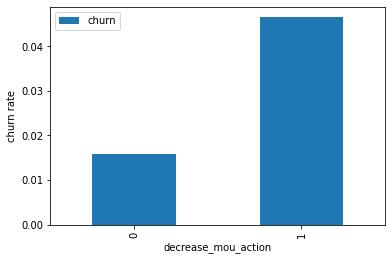

In [75]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

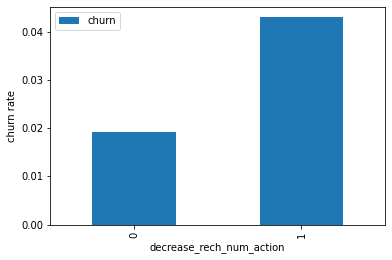

In [76]:
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

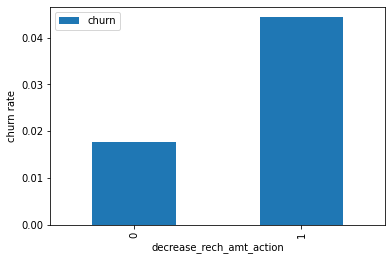

In [77]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

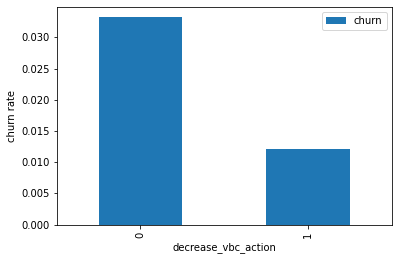

In [78]:
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [79]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

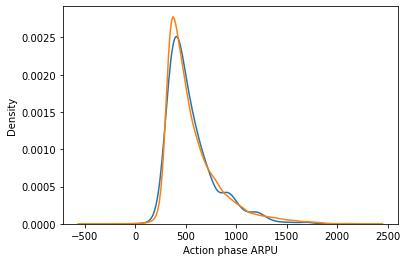

In [80]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

[Text(0.5, 0, 'Action phase MOU')]

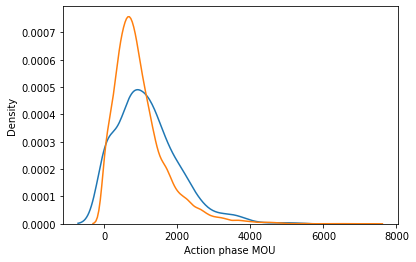

In [81]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

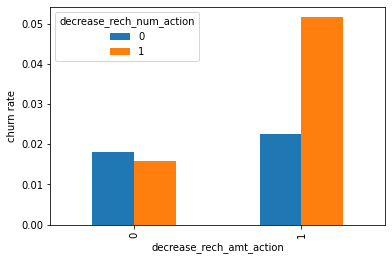

In [82]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

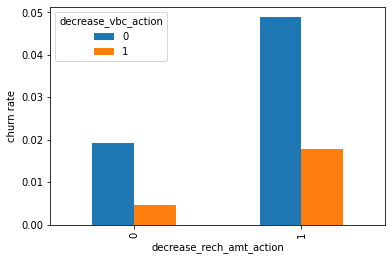

In [83]:
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

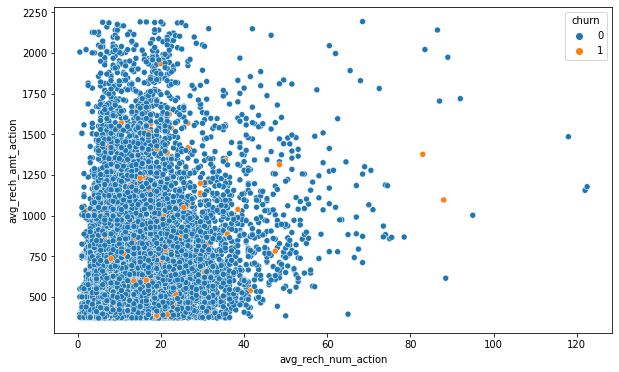

In [84]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='churn', data=data)

In [85]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

**Train-Test Split**

In [86]:
# Import library
from sklearn.model_selection import train_test_split

In [87]:
# Putting feature variables into X
X = data.drop(['id','churn'], axis=1)

In [88]:
# Putting target variable to y
y = data['churn']

In [89]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

**Dealing with data imbalance**
We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [90]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

In [91]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [92]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

**Feature Scaling**

In [93]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [94]:
# Instantiate the Scaler
scaler = StandardScaler()

In [95]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [96]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [97]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,-1.912767,1.642312,-0.767244,0.610850,-0.940302,2.251422,-0.079919,-0.282853,-0.242098,-0.449995,-0.371226,0.580704,-0.663135,1.620463,-0.268776,-0.231599,-0.195081,-0.240699,-0.673739,1.365357,-0.633773,0.457665,-0.639558,1.784227,-0.145693,-0.124705,0.0,0.0,-0.929344,1.565839,-0.079442,0.060234,-0.361025,-0.319329,-0.380587,-0.013782,-1.214153,2.109129,-0.431267,0.390694,-0.691943,0.644262,-0.295866,-0.249855,-0.734582,0.594664,-0.270174,1.619507,-0.374561,0.810948,-0.133634,0.647392,0.0,0.0,-0.433399,1.542655,-0.830153,1.573825,-0.368673,-0.111183,-0.175718,2.295879,-0.078438,1.068114,-1.252833,0.499572,-1.587248,1.773849,-0.276410,0.051794,0.191522,0.678324,-0.239817,-0.229141,-0.240901,-0.242813,-0.242490,-0.247726,-0.257329,-0.247618,-0.214762,-0.21251,-0.123384,-0.111907,-0.833902,-0.244521,-0.242420,-0.522105,0,0,0,0,0
1,0.0,0.0,0.0,0.173913,0.826880,0.003209,-0.291031,-0.082746,1.224479,-0.281074,-0.343294,-0.318125,-0.488182,0.557640,0.102739,-0.517735,1.629506,-0.268776,-0.261558,1.505557,0.419944,-0.007669,1.061139,-0.158194,-0.301731,0.099223,0.644803,-0.145693,-0.124705,0.0,0.0,-0.047896,0.235906,-0.079442,-0.078088,2.797831,0.994914,-0.380587,-0.013782,0.016389,0.759811,0.322354,0.255880,-0.514423,0.637766,0.416117,-0.249855,-0.138695,0.519964,-0.270174,-0.101873,-0.369585,-0.237418,-0.133634,-0.133144,0.0,0.0,-0.429907,-0.237615,-0.320894,0.306183,-0.368673,-0.111183,-0.175718,-0.152380,-0.078438,-0.077376,0.239555,0.008835,0.186426,0.827510,-0.276410,-0.262510,0.191522,-0.103970,-0.238620,-0.221331,0.508207,-0.056319,-0.242490,-0.247726,1.150490,-0.247618,-0.214762,-0.21251,2.655785,2.747932,1.190386,-0.244521,0.282586,-0.522105,0,1,0,0,1
2,0.0,0.0,0.0,-0.463272,0.421581,-0.590338,-0.519862,0.177392,0.727346,-0.281074,-0.343294,-0.318125,-0.488182,0.175715,0.107947,2.162696,2.930581,-0.229140,-0.089618,-0.195081,-0.240699,1.501150,1.878719,-0.633773,-0.555338,-0.621057,-0.493485,-0.145693,0.997087,0.0,0.0,-0.916066,-0.716981,-0.079442,-0.078088,-0.361025,-0.339837,-0.380587,-0.013782,-0.237277,0.229751,0.024482,0.415691,1.220470,1.944312,0.079549,-0.067186,0.869420,1.506889,-0.270174,-0.215802,-0.374561,-0.303586,0.321118,1.352863,0.0,0.0,-0.373406,-0.174705,0.560650,1.152767,-0.368673,-0.111183,-0.175718,-0.152380,-0.078438,-0.077376,-1.023235,-0.972640,-0.124249,0.401107,1.470250,2.000479,2.451121,3.015781,-0.239817,-0.229141,-0.240901,-0.242813,-0.242490,-0.247726,-0.257329,-0.247618,-0.214762,-0.21251,-0.123384,-0.111907,1.441821,-0.244521,-0.242420,-0.522105,0,1,0,0,0
3,0.0,0.0,0.0,0.7270

In [98]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
58165,0.0,0.0,0.0,-1.829895,3.359759,-0.785334,5.638013,-0.903831,1.170777,-0.218502,-0.333482,-0.187619,-0.400522,-0.371226,0.252856,-0.663135,0.501013,-0.268776,-0.261558,-0.195081,-0.240699,-0.673739,0.459487,-0.633773,6.124486,-0.639558,1.125417,-0.145693,-0.124705,0.0,0.0,-0.929344,5.091034,-0.079442,-0.078088,-0.361025,-0.339837,-0.380587,-0.013782,-1.214153,4.949183,-0.431267,-0.275907,-0.691943,-0.450256,-0.295866,-0.249855,-0.734582,-0.485328,-0.270174,-0.215802,-0.374561,-0.281490,-0.133634,-0.059536,0.0,0.0,-0.433399,-0.323272,-0.830153,-0.564624,-0.368673,-0.111183,-0.175718,-0.152380,-0.078438,-0.071026,-1.367632,4.670842,-1.982653,3.328155,-1.115417,-0.183934,-0.893876,-0.264198,-0.239817,-0.229141,-0.240901,-0.242813,-0.242490,-0.247726,-0.257329,-0.247618,-0.214762,-0.21251,-0.123384,-0.111907,-0.400875,-0.244521,-0.242420,-0.522105,0,0,0,0,0
603,0.0,0.0,0.0,-0.002146,-0.016705,-0.268793,0.775729,-0.292925,-0.736539,-0.267414,-0.332855,-0.121879,-0.226308,-0.313596,-0.319576,-0.584118,-0.516555,-0.268776,-0.261558,-0.195081,0.257596,-0.586897,-0.539424,-0.136539,1.000376,-0.024794,-0.474770,-0.145693,-0.124705,0.0,0.0,-0.120910,0.369657,-0.079442,0.108304,-0.312111,-0.084053,-0.380587,-0.013782,-0.388150,0.082643,-0.397279,-0.361433,-0.566879,-0.601434,-0.295866,-0.249855,-0.631035,-0.631079,-0.248652,-0.102176,-0.133414,-0.308685,-0.133634,-0.133144,0.0,0.0,-0.251987,-0.287335,-0.669901,-0.659295,-0.368673,-0.111183,-0.175718,-0.083155,-0.078438,-0.077376,3.913124,1.235679,-0.053641,-0.099572,-0.734050,-0.121073,-0.696531,-0.546955,-0.198772,2.019295,1.106912,-0.242813,-0.242490,-0.247726,8.189586,4.507611,-0.214762,-0.21251,-0.123384,1.318013,-0.970097,-0.244521,2.078634,-0.522105,0,1,1,1,1
28696,0.0,0.0,0.0,-0.241687,0.107897,-0.664742,-0.370800,-0.034281,0.483164,-0.281074,0.848213,-0.318125,0.623383,-0.067054,0.204781,1.311576,1.687545,2.364812,2.749349,0.075894,0.524425,0.937467,1.319669,-0.619385,-0.552884,-0.588263,-0.522491,-0.100821,1.446381,0.0,0.0,-0.881184,-0.727287,-0.079442,-0.078088,-0.210057,-0.068671,-0.380587,-0.013782,-0.449456,-0.042264,0.630010,0.831295,2.798958,2.730532,5.265070,5.810131,2.992326,3.194116,0.088424,-0.085185,0.479152,0.443079,2.193066,0.685290,0.0,0.0,0.675665,0.340672,2.786297,2.764672,-0.368673,-0.111183,-0.175718,-0.152380,-0.078438,-0.077376,-0.793637,-0.481903,0.180778,0.357091,1.554151,3.194834,1.079574,-0.490404,0.149250,0.075957,0.270026,0.513243,-0.242490,-0.247726,-0.257329,-0.247618,2.310172,2.19392,1.266200,-0.111907,0.275440,1.351343,0.633673,-0.522105,0,0,

**Model with PCA**

In [99]:
#Import PCA
from sklearn.decomposition import PCA

In [100]:
# Instantiate PCA
pca = PCA(random_state=42)

In [101]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [102]:
# Principal components
pca.components_

array([[ 1.61399624e-19, -1.38777878e-16, -4.44089210e-16, ...,
        -2.01315125e-02, -1.72607192e-02,  1.83602635e-02],
       [ 1.66188195e-19,  5.55111512e-17, -0.00000000e+00, ...,
         7.14575828e-03,  8.24631322e-04, -1.67413868e-02],
       [ 4.74959771e-19, -1.66533454e-16, -2.77555756e-17, ...,
        -6.00808464e-02, -5.86286435e-02,  2.96473038e-02],
       ...,
       [-0.00000000e+00, -1.61780504e-01, -1.02747648e-01, ...,
        -0.00000000e+00, -8.32667268e-17,  3.20923843e-17],
       [-0.00000000e+00,  3.65554814e-02,  9.43618984e-01, ...,
         2.22044605e-16,  1.11022302e-16,  6.41847686e-17],
       [ 9.99999835e-01, -5.59673220e-04,  8.21688247e-06, ...,
        -5.64123943e-19, -2.04643160e-18,  6.43745040e-19]])

In [103]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11100142 0.19546899 0.24895376 0.29780469 0.34234641 0.38530906
 0.42604334 0.45805803 0.48568248 0.51172021 0.53675386 0.56048858
 0.5837138  0.60495918 0.62441365 0.64358734 0.66162535 0.6791907
 0.69583897 0.71150624 0.72681683 0.74163784 0.75511486 0.76813067
 0.77996191 0.79154293 0.80267529 0.81335567 0.82377713 0.83356853
 0.84296849 0.85218853 0.86127975 0.86959993 0.87702321 0.88406023
 0.89091937 0.89720408 0.90331606 0.90917619 0.914947   0.92051761
 0.92571028 0.93079145 0.93553036 0.9393726  0.94314271 0.94685002
 0.95041103 0.95386145 0.95720716 0.96054213 0.96368443 0.96667946
 0.96962507 0.97251598 0.97531115 0.97804008 0.9805296  0.98295601
 0.98531794 0.98761197 0.98964624 0.9915942  0.99324957 0.99449198
 0.99566607 0.99677605 0.9976949  0.99851729 0.99899358 0.99944876
 0.99985582 0.9999622  0.99999913 0.99999987 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.      

Text(0, 0.5, 'Cumulative Variance')

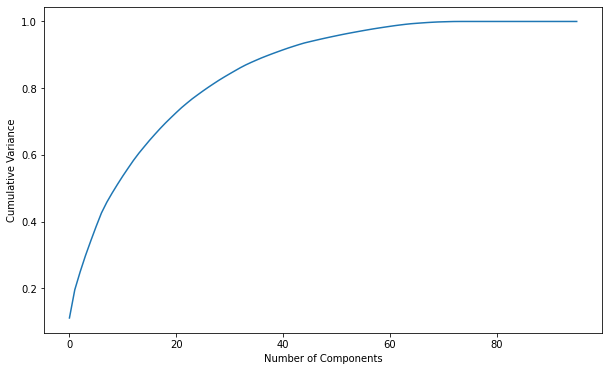

In [104]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

**Performing PCA with 60 components**

In [105]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [106]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [107]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

**Applying transformation on the test set**
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [108]:
X_test_pca = pca_final.transform(X_test)

**Logistic regression with PCA**

In [109]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [110]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [111]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [112]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [113]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.273800,0.007080,0.005875,0.000106,0.01,{'C': 0.01},0.905492,0.904259,0.915265,0.905582,0.900542,0.906228,0.004875,2,0.904866,0.907730,0.906378,0.906780,0.908944,0.906940,0.001363
1,0.499103,0.044123,0.005867,0.000081,0.1,{'C': 0.1},0.908685,0.910862,0.917206,0.905901,0.899904,0.908511,0.005693,1,0.908900,0.909651,0.908630,0.909362,0.911689,0.909647,0.001081
2,0.632364,0.015727,0.000000,0.000000,1,{'C': 1},NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.609031,0.025976,0.000000,0.000000,10,{'C': 10},NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.613947,0.027433,0.000000,0.000000,100,{'C': 100},NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.660372,0.075874,0.000000,0.000000,1000,{'C': 1000},NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


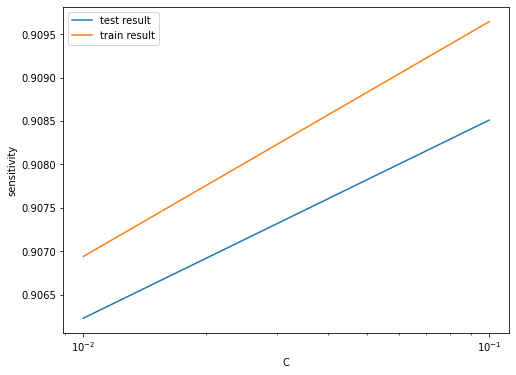

In [114]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [115]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9085114785799682 at C = 0.1


**Logistic regression with optimal C**

In [116]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [117]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

**Prediction on the train set**

In [118]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13288  2237]
 [ 1404 14121]]


In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8827375201288244
Sensitivity:- 0.9095652173913044
Specificity:- 0.8559098228663446


**Support Vector Machine(SVM) with PCA**

In [122]:
# Importing SVC
from sklearn.svm import SVC

In [123]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train) 

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 26.3min finished


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [124]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,19.178045,0.365795,6.201447,0.026110,1,0.01,"{'C': 1, 'gamma': 0.01}",0.939807,0.939034,0.939903,0.939581,0.000389,5,0.945072,0.944396,0.942415,0.943961,0.001127
1,25.706635,0.236472,8.641870,0.156193,1,0.001,"{'C': 1, 'gamma': 0.001}",0.883768,0.888406,0.887826,0.886667,0.002063,10,0.889469,0.888019,0.887488,0.888325,0.000837
2,34.345625,0.585585,11.907352,0.035145,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.855845,0.859614,0.861256,0.858905,0.002265,12,0.859034,0.860386,0.858841,0.859420,0.000688
3,15.888879,0.269579,4.129358,0.054487,10,0.01,"{'C': 10, 'gamma': 0.01}",0.961159,0.961256,0.964928,0.962448,0.001754,3,0.972126,0.970918,0.968792,0.970612,0.001378
4,22.164531,0.386522,7.003769,0.059948,10,0.001,"{'C': 10, 'gamma': 0.001}",0.907536,0.911208,0.910821,0.909855,0.001647,7,0.912995,0.912560,0.912126,0.912560,0.000355
5,26.296966,0.344730,8.749217,0.080898,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.878937,0.880966,0.882319,0.880741,0.001390,11,0.883043,0.879758,0.881014,0.881272,0.001353
6,17.365445,0.754204,2.758678,0.073944,100,0.01,"{'C': 100, 'gamma': 0.01}",0.972077,0.975169,0.975266,0.974171,0.001481,2,0.988744,0.987778,0.987729,0.988084,0.000467
7,22.611620,0.688433,5.487633,0.052150,100,0.001,"{'C': 100, 'gamma': 0.001}",0.935072,0.937391,0.934300,0.935588,0.001314,6,0.941932,0.942995,0.940435,0.941787,0.001050
8,23.702248,0.333187,7.547367,0.090135,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.888406,0.893913,0.892947,0.891755,0.002401,9,0.896135,0.893768,0.891401,0.893768,0.001933
9,25.262588,1.287461,1.944148,0.065092,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.975362,0.978551,0.980097,0.978003,0.001971,1,0.997778,0.997633,0.997633,0.997681,0.000068


**Plotting the accuracy with various C and gamma values**

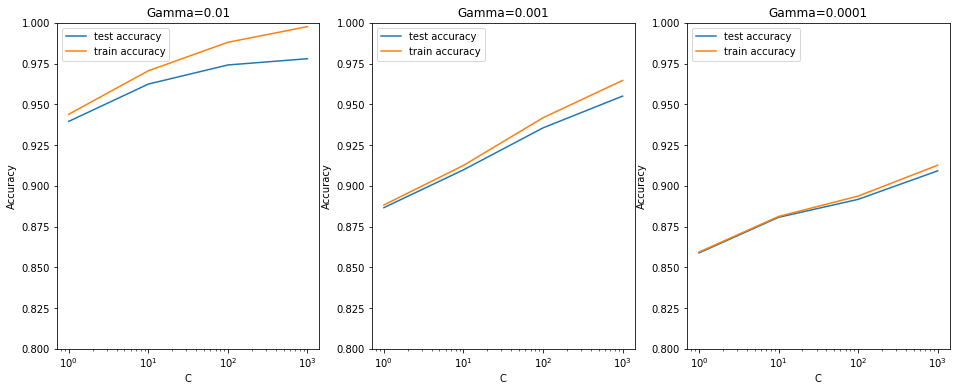

In [125]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [126]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9780032206119161 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


From the above plot, we can see that higher value of gamma leads to overfitting the model. With the lowest value of gamma (0.0001) we have train and test accuracy almost same.

Also, at C=100 we have a good accuracy and the train and test scores are comparable.

Though sklearn suggests the optimal scores mentioned above (gamma=0.01, C=1000), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~90%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

**Build the model with optimal hyperparameters**

In [127]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

##### Prediction on the train set

In [128]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [129]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13352  2173]
 [ 1050 14475]]


In [130]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [131]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8961996779388084
Sensitivity:- 0.9323671497584541
Specificity:- 0.8600322061191626


##### Prediction on the test set

In [132]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [133]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3333  534]
 [  28  106]]


In [134]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [135]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8595351162209448
Sensitivity:- 0.7910447761194029
Specificity:- 0.8619084561675717


## Decision tree with PCA

In [136]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter tuning

In [137]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   53.9s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [138]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.062921,0.013720,0.004075,0.000054,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.881481,0.882770,0.844767,0.881159,0.918519,0.881739,0.023329,3
1,1.051482,0.005330,0.004041,0.000045,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.881481,0.882770,0.844767,0.881159,0.918519,0.881739,0.023329,3
2,1.048974,0.009197,0.004111,0.000172,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.872464,0.876006,0.830918,0.878261,0.918841,0.875298,0.027867,7
3,1.045205,0.005902,0.004014,0.000052,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.872464,0.876006,0.830918,0.878261,0.918841,0.875298,0.027867,7
4,1.695234,0.026629,0.004554,0.000684,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.878905,0.898229,0.894364,0.918196,0.911755,0.900290,0.013775,2
5,1.676146,0.015762,0.004320,0.000235,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.878905,0.898229,0.895330,0.918196,0.911755,0.900483,0.013697,1
6,1.585491,0.025413,0.004191,0.000038,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.857971,0.883414,0.882448,0.876973,0.884058,0.876973,0.009826,5
7,1.582652,0.019776,0.004385,0.000439,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.855717,0.883414,0.882448,0.876973,0.884058,0.876522,0.010700,6


In [139]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9004830917874396
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


##### Model with optimal hyperparameters

In [140]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [141]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [142]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13705  1820]
 [ 1147 14378]]


In [143]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [144]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9044444444444445
Sensitivity:- 0.9261191626409018
Specificity:- 0.8827697262479871


##### Prediction on the test set

In [145]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [146]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3333  534]
 [  47   87]]


In [147]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.854786303424144
Sensitivity:- 0.9261191626409018
Specificity:- 0.8827697262479871


**Random forest with PCA**

In [148]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

##### Hyperparameter tuning

In [149]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 12.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [150]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8519806763285024 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


##### Model with optimal hyperparameters

In [151]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [152]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

##### Prediction on the train set

In [153]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12581  2944]
 [ 1622 13903]]


In [154]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [155]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8529468599033816
Sensitivity:- 0.8955233494363929
Specificity:- 0.8103703703703704


##### Prediction on the test set

In [156]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [157]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3127  740]
 [  38   96]]


In [158]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8055486128467882
Sensitivity:- 0.7164179104477612
Specificity:- 0.808637186449444


# Without PCA

## Logistic regression with No PCA

In [159]:
##### Importing stats model
import statsmodels.api as sm

In [160]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [161]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [162]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    30960
Model Family:                Binomial   Df Model:                           89
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9183.3
Date:                Thu, 27 Jan 2022   Deviance:                       18367.
Time:                        08:45:44   Pearson chi2:                 3.39e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1520      0.064     -2.369      0.018      -0.278      -0.026
loc_og_t2o_mou           -3.166e-08   1.72e-08     -1.837      0.066   -6.54e-08    2.12e-09
std_og_t2o_mou           -2.266e-07    2.7e-08     -8.382      0.000    -2.8e-07   -1.74e-07
loc_ic_t2o_mou            1.402e-07   2.07e-08      6.769      0.000    9.96e-08    1.81e-07
arpu_6                      -0.2700      0.089     -3.034      0.002      -0.444      -0.096
arpu_7                       0.6665      0.096      6.962      0.000       0.479       0.854
onnet_mou_6                 -4.4292      3.367     -1.316      0.188     -11.028       2.170
onnet_mou_7                  3.6748      1.870      1.966      0.049       0.010       7.339
offnet_mou_6                -6.1013      3.304     -1.846      0.065     -12.577       0.375
offnet_mou_7                 0.9922      1.770      0.561      0.575      -2.477       4.461
roam_ic_mou_6               -0.1898      0.043     -4.390      0.000      -0.274      -0.105
roam_ic_mou_7                0.3015      0.049      6.109      0.000       0.205       0.398
roam_og_mou_6                1.8489      1.098      1.684      0.092      -0.303       4.001
roam_og_mou_7                0.1454      0.490      0.296      0.767      -0.816       1.107
loc_og_t2t_mou_6          3376.1913    723.737      4.665      0.000    1957.693    4794.689
loc_og_t2t_mou_7           934.5958    755.576      1.237      0.216    -546.307    2415.498
loc_og_t2m_mou_6          3565.5574    764.224      4.666      0.000    2067.707    5063.408
loc_og_t2m_mou_7           898.0174    725.158      1.238      0.216    -523.267    2319.302
loc_og_t2f_mou_6           293.6305     62.902      4.668      0.000     170.345     416.916
loc_og_t2f_mou_7            75.1804     61.033      1.232      0.218     -44.443     194.804
loc_og_t2c_mou_6             0.1290      0.034      3.818      0.000       0.063       0.195
loc_og_t2c_mou_7            -0.1084      0.029     -3.684      0.000      -0.166      -0.051
loc_og_mou_6             -6885.9085   1395.877     -4.933      0.000   -9621.776   -4150.041
loc_og_mou_7              3484.4754   1457.469      2.391      0.017     627.888    6341.063
std_og_t2t_mou_6          5435.6162   2065.460      2.632      0.008    1387.389    9483.843
std_og_t2t_mou_7         -1.162e+04   1731.553     -6.713      0.000    -1.5e+04   -8230.004
std_og_t2m_mou_6          5284.5723   2007.300      2.633      0.008    1350.337    9218.807
std_og_t2m_mou_7         -1.154e+04   1719.737     -6.712      0.000   -1.49e+04   -8171.642
std_og_t2f_mou_6           115.7286     43.962      2.632      0.008      29.564     201.893
std_og_t2f_mou_7          -302.7162     45.089     -6.714      0.000    -391.088    -214.344
std_og_t2c_mou

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

***Coarse tuning (Auto+Manual)***

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

#### Top predictors

Below are few top variables selected in the logistic regression model.

| Variables   | Coefficients |
|---------------------|--------------|
|loc_ic_mou_8|-3.3287|
|og_others_7|-2.4711|
|ic_others_8|-1.5131|
|isd_og_mou_8|-1.3811|
|decrease_vbc_action|-1.3293|
|monthly_3g_8|-1.0943|
|std_ic_t2f_mou_8|-0.9503|
|monthly_2g_8|-0.9279|
|loc_ic_t2f_mou_8|-0.7102|
|roam_og_mou_8|0.7135|

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:- 

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

***Recomendations***

1. Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target the customers, whose outgoing others charge in July and incoming others on August are less.
3. Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
8. roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.
